# Machine Learning no supervisado: K-Means

In [1]:
import numpy as np
import matplotlib.pyplot as  plt
import pandas as pd

**Ejemplo**

Segmentación de clientes de un centro comercial. Deseamos clasificar un grupo de clientes en base a su ingreso anual y su puntaje en gasto en el centro comercial.

In [2]:
datos = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
datos.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Declaramos nuestras variables de interés en un objeto X

In [5]:
X = datos[["Annual Income (k$)","Spending Score (1-100)"]]

In [6]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Importamos el modelo del paquete sklearn

In [10]:
from sklearn.cluster import KMeans

Técnica del codo

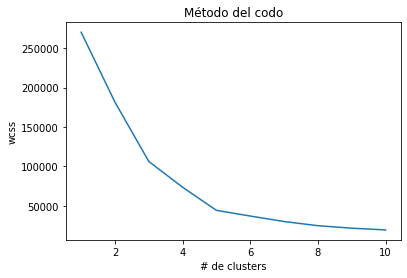

In [12]:
err_sum =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(X)
  err_sum.append(kmeans.inertia_)
plt.plot(range(1,11),err_sum)
plt.title("Método del codo")
plt.xlabel("# de clusters")
plt.ylabel("wcss")
plt.show()

Número óptimo de clusters = 5

In [13]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [14]:
y_predict = kmeans.fit_predict(X)

In [15]:
y_predict

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

## Representación gráfica

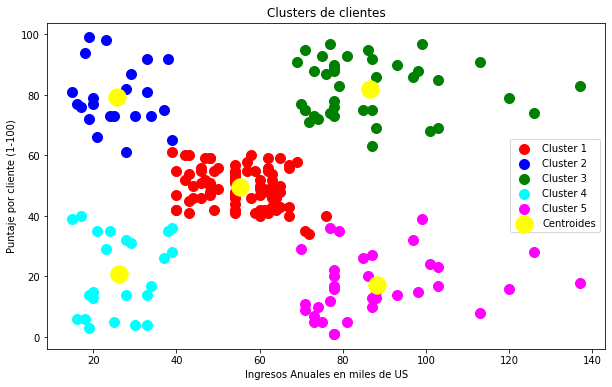

In [18]:
colores = ["red","blue","green","cyan","magenta"]
plt.figure(figsize=(10,6))
for i in range(5):
  plt.scatter(X.iloc[y_predict==i,0],X.iloc[y_predict==i,1],s=100,c=colores[i],label="Cluster %d"%(i+1))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="Centroides")
plt.title("Clusters de clientes")
plt.xlabel("Ingresos Anuales en miles de US")
plt.ylabel("Puntaje por cliente (1-100)")
plt.legend()
plt.show()

$$coef silueta(i) = \frac{b-a}{max(b,a)}$$

$a$ es el promedio de distancias del cluster al cual pertenece i.

$b$ es el promedio de distancias del cluster más cercano al cluster de i


entre más grande sea este coeficiente de silueta, el número de clusters asociado a ese coeficiente es el óptimo.

In [19]:
from sklearn import metrics

In [20]:
silueta_promedio = []
min_k = 2
for k in range(min_k,11):
  kmeans = KMeans(n_clusters=k,random_state=0).fit(X)
  score = metrics.silhouette_score(X,kmeans.labels_)
  print("Los coeficientes de silueta para k=",k," es ",score)
  silueta_promedio.append(score)
optim_k = silueta_promedio.index(max(silueta_promedio))+min_k
print("El k óptimo es ",optim_k)

Los coeficientes de silueta para k= 2  es  0.2968969162503008
Los coeficientes de silueta para k= 3  es  0.46761358158775435
Los coeficientes de silueta para k= 4  es  0.4931963109249047
Los coeficientes de silueta para k= 5  es  0.553931997444648
Los coeficientes de silueta para k= 6  es  0.5393922132561455
Los coeficientes de silueta para k= 7  es  0.5270287298101395
Los coeficientes de silueta para k= 8  es  0.4575689106804838
Los coeficientes de silueta para k= 9  es  0.4565077334305076
Los coeficientes de silueta para k= 10  es  0.449795408266166
El k óptimo es  5


## Clustering Jerárquico


In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
from scipy.cluster import hierarchy as sch

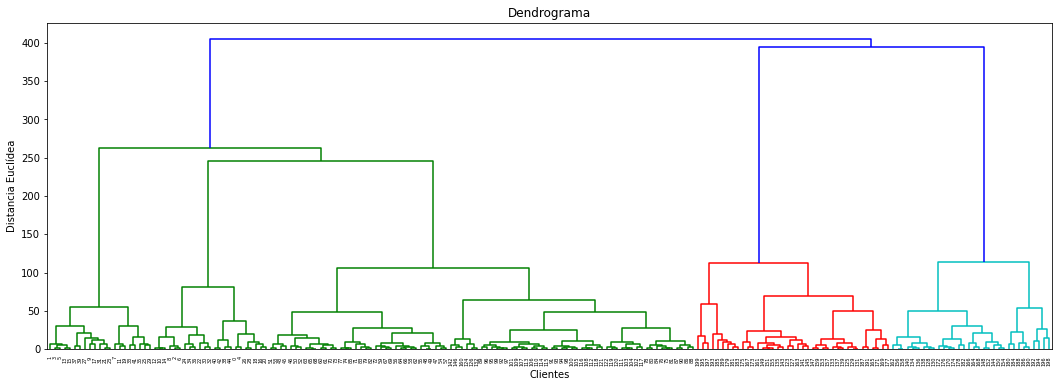

In [27]:
plt.figure(figsize=(18,6))
dendrogram = sch.dendrogram(sch.linkage(X,method="ward")) # 
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclídea")
plt.show()

In [28]:
silueta_promedio = []
min_k = 2
for k in range(min_k,11):
  jer = AgglomerativeClustering(n_clusters=k).fit(X)
  score = metrics.silhouette_score(X,jer.labels_)
  print("Los coeficientes de silueta para k=",k," es ",score)
  silueta_promedio.append(score)
optim_k = silueta_promedio.index(max(silueta_promedio))+min_k
print("El k óptimo es ",optim_k)

Los coeficientes de silueta para k= 2  es  0.36706444723912895
Los coeficientes de silueta para k= 3  es  0.4618340266628975
Los coeficientes de silueta para k= 4  es  0.4916598193892782
Los coeficientes de silueta para k= 5  es  0.5529945955148897
Los coeficientes de silueta para k= 6  es  0.5380208285578872
Los coeficientes de silueta para k= 7  es  0.519904611908887
Los coeficientes de silueta para k= 8  es  0.4326286245782246
Los coeficientes de silueta para k= 9  es  0.43892545672004507
Los coeficientes de silueta para k= 10  es  0.4342656377895271
El k óptimo es  5


El número de clusters óptimo es de 5. Ajustamos entonces un modelo de cluster jerárquico con 5 clusters:

In [29]:
h = AgglomerativeClustering(n_clusters=5).fit(X)

In [30]:
clasificacion = h.fit_predict(X)

In [31]:
clasificacion

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Elaboramos un diagrama de dispersión como en KMeans

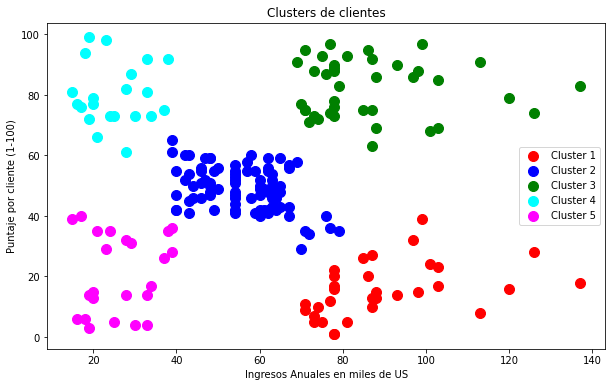

In [32]:
colores = ["red","blue","green","cyan","magenta"]
plt.figure(figsize=(10,6))
for i in range(5):
  plt.scatter(X.iloc[clasificacion==i,0],X.iloc[clasificacion==i,1],s=100,c=colores[i],label="Cluster %d"%(i+1))
plt.title("Clusters de clientes")
plt.xlabel("Ingresos Anuales en miles de US")
plt.ylabel("Puntaje por cliente (1-100)")
plt.legend()
plt.show()